In [1]:
# Libraries
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Train data
train = pd.read_csv("data_files/train.csv", header = 0)
train.info()

In [ ]:
# Building meta data
building = pd.read_csv("data_files/building_metadata.csv")
building.info()

In [ ]:
# Weather train data
weather_train = pd.read_csv("data_files/weather_train.csv")
weather_train.info()

In [ ]:
# Weather test data
weather_train = pd.read_csv("data_files/weather_test.csv")
weather_train.info()

In [2]:
def memory_reduction(df):
    itypes = [np.int8, np. int16, np.int32, np.int64] 
    ftypes = [np.float16, np.float32, np.float64]
    iinfo = [np.iinfo(t) for t in itypes]
    finfo = [np.finfo(t) for t in ftypes]
    for col in df:
        if is_numeric_dtype(df[col]):
            col_max = df[col].max()
            col_min = df[col].min()
            if np.issubdtype(df[col].dtype, np.integer):
                for ii in iinfo:
                    if col_min >= ii.min and col_max <= ii.max:
                        df[col] = df[col].astype(ii.dtype)
                        break
            else:
                for fi in finfo:
                    if col_min >= fi.min and col_max <= fi.max:
                        df[col] = df[col].astype(fi.dtype)
                        break
    return df

In [3]:
def load_data(base, task):
    train = memory_reduction(pd.read_csv(f"{base}/{task}.csv", parse_dates = ['timestamp']))
    building = memory_reduction(pd.read_csv(f"{base}/building_metadata.csv"))
    weather = memory_reduction(pd.read_csv(f"{base}/weather_{task}.csv", parse_dates = ['timestamp']))
    return train.merge(building.merge(weather, on = "site_id", how = "left"), how = "left", on = ["building_id", "timestamp"])

In [4]:
train = load_data("data_files", "train")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
site_id               float64
primary_use           object
square_feet           float64
year_built            float16
floor_count           float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: datetime64[ns](1), float16(9), float32(1), float64(2), int16(1), int8(1), object(1)
memory usage: 1.2+ GB


## EDA

In [10]:
train['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

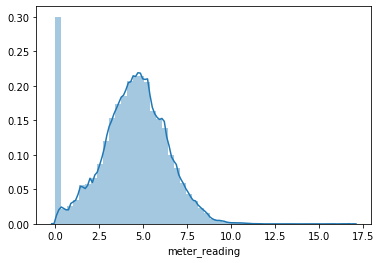

In [21]:
# Target variable
sns.distplot(np.log1p(train['meter_reading']))

There seems to be a lot of rows with 0 meter readings. Let's see the proportion of data with 0 meter reading..

In [24]:
train.loc[train.meter_reading == 0, 'meter_reading'].count()/train['meter_reading'].count()

0.09269720668180312